In [2]:
import sys
sys.path.append("..")
from package import online
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3d
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pickle
iso=__import__("Isotropic features")

isom=iso.isomodel()                       # import data of isotropic model from the class
A,x_0,x_1,beta,r,n,d=isom.generate()      # generate the data
betag=10                                  # batch size is set as 10

In [3]:
osgd=online.onlinesgd(n,r,x_0,x_1,betag)   # import the online SGD class

In [4]:
"""
Ths following process is to calculate the values for each update 
with regenerating data matrix A which is in 1000*1200 dimension
and randomly select 10 samples to conduct the update. 1.2,2,4,8 
mean different step size.
"""

y1=osgd.batchsize(1.2)
y2=osgd.batchsize(2)
y3=osgd.batchsize(4)
y4=osgd.batchsize(8)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:41<00:00, 12.13it/s]


In [5]:
"""
store the results and load the results with pickle
"""


file1=open("data\\sgd-1p2.pickle","wb")
file2=open("data\\sgd-2.pickle","wb")
file3=open("data\\sgd-4.pickle","wb")
file4=open("data\\sgd-8.pickle","wb")

pickle.dump(y1,file1)
pickle.dump(y2,file2)
pickle.dump(y3,file3)
pickle.dump(y4,file4)

file1.close()
file2.close()
file3.close()
file4.close()

file1=open("data\\sgd-1p2.pickle","rb")
file2=open("data\\sgd-2.pickle","rb")
file3=open("data\\sgd-4.pickle","rb")
file4=open("data\\sgd-8.pickle","rb")

y1=pickle.load(file1)
y2=pickle.load(file2)
y3=pickle.load(file3)
y4=pickle.load(file4)

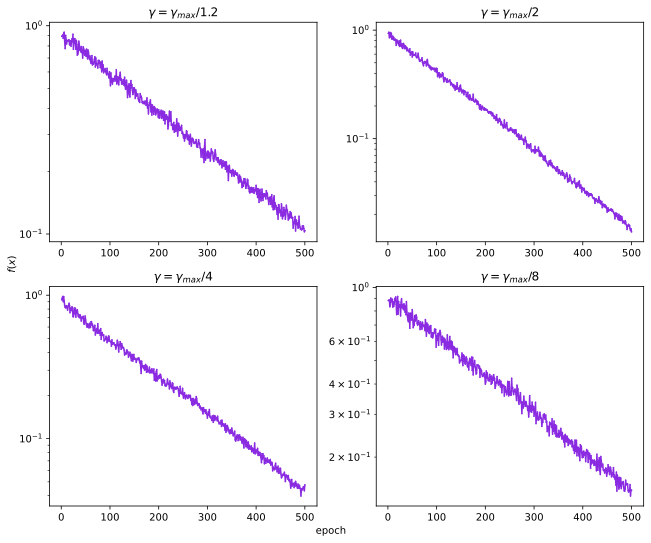

In [5]:
"""
Plot the results for each step size and save it as plot.pdf
"""

fig=plt.figure(figsize=(9,7.5))


ax1=plt.subplot(2,2,1)
ax1.set_yscale("log")
ax1.set_title(r"$\gamma=\gamma_{max}/1.2$")
ax1.plot(range(1,len(y1)+1),y1,color="blueviolet",marker="o",markersize=0.5)


ax2=plt.subplot(2,2,2)
ax2.set_yscale("log")
ax2.set_title(r"$\gamma=\gamma_{max}/2$")
ax2.plot(range(1,len(y2)+1),y2,color="blueviolet",marker="o",markersize=0.5)

ax3=plt.subplot(2,2,3)
ax3.set_yscale("log")
ax3.set_title(r"$\gamma=\gamma_{max}/4$")
ax3.plot(range(1,len(y3)+1),y3,color="blueviolet",marker="o",markersize=0.5)


ax4=plt.subplot(2,2,4)
ax4.set_yscale("log")
ax4.set_title(r"$\gamma=\gamma_{max}/8$")
ax4.plot(range(1,len(y4)+1),y4,color="blueviolet",marker="o",markersize=0.5)

fig.text(0.5,0,"epoch",ha="center")
fig.text(0,0.5,r"$f(x)$",va="center",rotation="vertical")
plt.tight_layout()
fig.savefig("plot.pdf",dpi=600,format="pdf")

In [14]:
"""
The following process is to calculate the values of f(x) under SGD model 
and only input 5 samples (randomly generated) for each update， which mean 
data matrix A is in 5* 1200 dimension.
"""

y1=osgd.batchone()


"""
Store and load the results
"""
file1=open("data\\one-1p2.pickle","wb")
pickle.dump(y1,file1)
file1.close()
file1=open("data\\one-1p2.pickle","rb")
y1=pickle.load(file1)

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6492.07it/s]


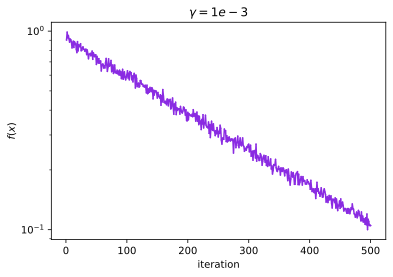

In [6]:
"""
Plot the results
"""

fig=plt.figure()


plt.yscale("log")
plt.title(r"$\gamma=1e-3$")
plt.plot(range(1,len(y1)+1),y1,color="blueviolet",marker="o",markersize=0.5)
plt.xlabel("iteration")
plt.ylabel(r"$f(x)$")
fig.savefig("plot.pdf",dpi=600,format="pdf")

